In [5]:
import astropy
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from dust_extinction.parameter_averages import CCM89, F99


# Leer el archivo FITS
sp1 = ascii.read("../../../reduccion/NGC1313/cal/slit1_ascii.txt")
print(sp1)

# renombrar las columnas
sp1['col1'].name = 'wavelength'
sp1['col2'].name = "flux"
sp1

wave = sp1["wavelength"]
flux = sp1["flux"]
wave.data



      col1           col2   
---------------- -----------
4024.00463867189   0.2809365
4025.50053572656   0.1263353
4026.99643278123   0.6645973
 4028.4923298359   0.2400979
4029.98822689057   0.4354501
4031.48412394525 -0.03192461
4032.98002099992   0.2785238
4034.47591805459   0.2410768
4035.97181510926   0.3245422
4037.46771216393   0.3363686
             ...         ...
7349.38379120828  0.07615397
7350.87968826295  0.07790677
7352.37558531762  0.07631195
7353.87148237229  0.07529981
7355.36737942697  0.07321899
7356.86327648164  0.07274434
7358.35917353631  0.06967138
7359.85507059098  0.07259004
7361.35096764566  0.07287291
7362.84686470033  0.07423379
  7364.342761755  0.06625135
Length = 2234 rows


array([4024.00463867, 4025.50053573, 4026.99643278, ..., 7361.35096765,
       7362.8468647 , 7364.34276175])

In [12]:
pip install ipympl

  Using cached ipympl-0.9.3-py2.py3-none-any.whl.metadata (1.3 kB)
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/belen/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2751, in _dep_map
    return self.__dep_map
  File "/Users/belen/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _Distribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/belen/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/Users/belen/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/Users/belen/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/commands/install.py", line 377,

Note: you may need to restart the kernel to use updated packages.


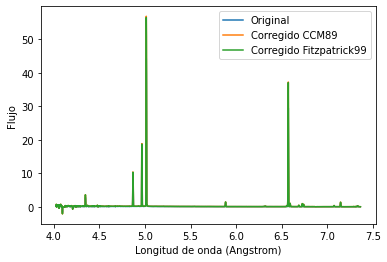

In [26]:
wavelength_microns = wave/1e3
# Valor de E(B-V) obtenido previamente
E_BV = 0.09645  # Reemplaza esto con el valor correcto

# Crear curvas de extinción usando CCM89 y F99
ext_curve_ccm = CCM89(Rv=3.1)
ext_curve_f99 = F99(Rv=3.1)

# Calcular la extinción en cada longitud de onda
A_lambda_ccm = ext_curve_ccm(wavelength_microns) * E_BV
A_lambda_f99 = ext_curve_f99(wavelength_microns) * E_BV

# Convertir A_lambda a factores de corrección
flux_correction_factor_ccm = 10**(0.4 * A_lambda_ccm)
flux_correction_factor_f99 = 10**(0.4 * A_lambda_f99)

# Corregir el espectro
flux_corrected_ccm = flux * flux_correction_factor_ccm
flux_corrected_f99 = flux * flux_correction_factor_f99

# Guardar los espectros corregidos en nuevos archivos FITS
hdu_ccm = fits.BinTableHDU.from_columns([
    fits.Column(name='wavelength', format='E', array=wavelength_microns),
    fits.Column(name='flux', format='E', array=flux_corrected_ccm)
])
hdu_ccm.writeto('espectro_corregido_ccm.fits', overwrite=True)

hdu_f99 = fits.BinTableHDU.from_columns([
    fits.Column(name='wavelength', format='E', array=wavelength_microns),
    fits.Column(name='flux', format='E', array=flux_corrected_f99)
])
hdu_f99.writeto('espectro_corregido_f99.fits', overwrite=True)

# Verificar visualmente la corrección


plt.figure()
plt.plot(wavelength_microns, flux, label='Original')
plt.plot(wavelength_microns, flux_corrected_ccm, label='Corregido CCM89')
plt.plot(wavelength_microns, flux_corrected_f99, label='Corregido Fitzpatrick99')
plt.xlabel('Longitud de onda (Angstrom)')
plt.ylabel('Flujo')
plt.legend()
plt.show()
